In [20]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import base64
import io
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go
import matplotlib.colors as colors
import yaml
from yaml.loader import SafeLoader
import locale
import geopandas as gpd




# user="/home/ruben/" 
# user = "C:/Users/joana.APCE/"
# path = user + "Dropbox/Estudi d'oferta/2022/repos/APP-Estudi_oferta/"

path = ""
def weighted_mean(data):
    weighted_sum = (data['Valor'] * data['Unitats']).sum()
    sum_peso = data['Unitats'].sum()
    # data["Valor"] = weighted_sum / sum_peso
    return weighted_sum / sum_peso

############################################################  IMPORTAMOS BBDD 2022 ################################################
def tidy_bbdd(any):
    # Importar BBDD promocions d'habitatge
    bbdd_estudi_prom = pd.read_excel(path + 'BBDD 2022_2021 03.02.23.xlsx', sheet_name='Promocions 2022_2021')
    bbdd_estudi_prom.columns = bbdd_estudi_prom.iloc[0,:]
    bbdd_estudi_prom = bbdd_estudi_prom[bbdd_estudi_prom["ESTUDI"]==any]
    bbdd_estudi_prom['TIPO_aux'] = np.where(bbdd_estudi_prom['TIPO'].isin([1,2]), 'Habitatges Unifamiliars', 'Habitatges Plurifamiliars')

    mapping = {1: 'Unifamiliars aïllats', 
            2: 'Unifamiliars adossats', 
            3: 'Plurifamiliars en bloc obert', 
            4: 'Plurifamiliars en bloc tancat'}

    mapping1 = {1: "De nova Construcció",
                2: "Rehabilitació integral"}

    mapping2 = {1: "Pendent d'enderroc", 
            2: "Solar", 
            3: "Buidat", 
            4: "Cimentació",
            5: "Estructura",
            6: "Tancaments exteriors",
            7: "Tancaments interiors",
            8: "Claus en mà",
            9: "NS/NC"}

    mapping3 = {
                    1: 'A',
                    1.2:"A",
                    2: 'B',
                    2.3: "B",
                    3: 'C',
                    4: 'D',
                    4.5: "D",
                    5: 'E',
                    5.3 : "C",
                    6: "F",
                    7: "G",
                    8: "En tràmits",
                    9: "Sense informació"
    }

    mapping4 = {
                    0: "Altres",
                    1: "Plaça d'aparcament opcional",
                    2: "Plaça d'aparcament inclosa",
                    3: "Sense plaça d'aparcament",
    }


    # bbdd_estudi_hab['QENERGC'] = bbdd_estudi_hab['QENERGC'].map(number_to_letter_map)

    bbdd_estudi_prom['TIPO'] = bbdd_estudi_prom['TIPO'].map(mapping)

    bbdd_estudi_prom['TIPH'] = bbdd_estudi_prom['TIPH'].map(mapping1)


    bbdd_estudi_prom['ESTO'] = bbdd_estudi_prom['ESTO'].map(mapping2)

    bbdd_estudi_prom['QENERGC'] = bbdd_estudi_prom['QENERGC'].map(mapping3)

    bbdd_estudi_prom['APAR'] = bbdd_estudi_prom['APAR'].map(mapping4)


    # Importar BBDD habitatges
    bbdd_estudi_hab = pd.read_excel(path + 'BBDD 2022_2021 03.02.23.xlsx', sheet_name='Habitatges 2022_2021')
    bbdd_estudi_hab.columns = bbdd_estudi_hab.iloc[0,:]
    bbdd_estudi_hab = bbdd_estudi_hab[bbdd_estudi_hab["ESTUDI"]==any]





    # ["Total dormitoris","Banys i lavabos","Cuines estàndard","Cuines americanes","Terrasses, balcons i patis","Estudi/golfes","Safareig","Altres interiors","Altres exteriors"]

    # ["DORM", "LAV", "cuina_normal", "cuina_amer", "TER", "Golfes", "Safareig","Altres interiors","Altres exteriors" ]

    bbdd_estudi_hab['TIPOG'] = np.where(bbdd_estudi_hab['TIPO'].isin([1,2]), 'Habitatges Unifamiliars', 'Habitatges Plurifamiliars')
    bbdd_estudi_hab['TIPO'] = bbdd_estudi_hab['TIPO'].map(mapping)
    bbdd_estudi_hab['QENERGC'] = bbdd_estudi_hab['QENERGC'].map(mapping3)
    bbdd_estudi_hab['APAR'] = bbdd_estudi_hab['APAR'].map(mapping4)

    bbdd_estudi_hab = bbdd_estudi_hab.dropna(axis=1 , how ='all')



    bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {'V0006':'Total dormitoris_aux', 
                                                            "DORM": "Total dormitoris",
                                                            "LAV": "Banys i lavabos",
                                                            "TER": "Terrasses, balcons i patis",
                                                            'NOMD01C':'Superfície útil',
                                                            "Preu_m2_util": "Preu m2 útil",
                                                            "NOMD01F_2022": "Preu mitjà",
                                                            'NOMD01P':'Estudi/golfes', 
                                                            'NOMD01Q':'Safareig', 
                                                            'NOMD01K': 'Cuines estàndard', 
                                                            'NOMD01L': 'Cuines americanes', 
                                                            "NOMD01R": "Altres interiors", 
                                                            "NOMD01S":"Altres exteriors"})

    bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'V0006':'Total dormitoris_aux', 
                                                            "DORM": "Total dormitoris",
                                                            "LAV": "Banys i lavabos",
                                                            "TER": "Terrasses, balcons i patis",
                                                            'NOMD01C':'Superfície útil',
                                                            "Preu_m2_util": "Preu m2 útil",
                                                            'NOMD01P':'Estudi/golfes', 
                                                            'NOMD01Q':'Safareig', 
                                                            'NOMD01K': 'Cuines estàndard', 
                                                            'NOMD01L': 'Cuines americanes', 
                                                            "NOMD01R": "Altres interiors", 
                                                            "NOMD01S":"Altres exteriors"})


    # Canviar de nom tots els equipaments
    bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {'EQUIC_1': 'Zona enjardinada', 
                                                        'EQUIC_2': 'Parc infantil',
                                                        'EQUIC_3': 'Piscina comunitària', 
                                                        'EQUIC_4': 'Traster', 
                                                        'EQUIC_5': 'Ascensor', 
                                                        'EQUIC_6': 'Equipament Esportiu',  
                                                        'EQUIC_7': 'Sala de jocs', 
                                                        'EQUIC_8': 'Sauna', 
                                                        "EQUIC_9_50": "Altres",
                                                        'EQUIC_99': 'Cap dels anteriors'})
    bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'EQUIC_1': 'Zona enjardinada', 
                                                        'EQUIC_2': 'Parc infantil',
                                                        'EQUIC_3': 'Piscina comunitària', 
                                                        'EQUIC_4': 'Traster', 
                                                        'EQUIC_5': 'Ascensor', 
                                                        'EQUIC_6': 'Equipament Esportiu',  
                                                        'EQUIC_7': 'Sala de jocs', 
                                                        'EQUIC_8': 'Sauna', 
                                                        "QUAL_ALTRES": "Altres",
                                                        'EQUIC_99': 'Cap dels anteriors'})
    bbdd_estudi_prom["Ascensor"] = np.where(bbdd_estudi_prom["Ascensor"]>=1, 1, bbdd_estudi_prom["Ascensor"])
    bbdd_estudi_hab["Ascensor"] = np.where(bbdd_estudi_hab["Ascensor"]>=1, 1, bbdd_estudi_hab["Ascensor"])


    # Canviar de nom totes les qualitats
    bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {"QUALIC_5": "Aire condicionat", 
                                                        "QUALIC_6": "Bomba de calor", 
                                                        "QUALI_A": "Aero", 
                                                        'QUALIC_7':"Calefacció", 
                                                        'QUALIC_8':"Preinstal·lació d'A.C./B. Calor/Calefacció", 
                                                        'QUALIC_9': 'Parquet', 
                                                        'QUALIC_10':'Armaris encastats',
                                                        'QUALIC_12':'Placa de cocció amb gas',
                                                        'QUALIC_13':'Placa de cocció vitroceràmica',
                                                        "QUALIC_14":"Placa d'inducció",
                                                        'QUALIC_22':'Plaques solars'})


    bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {"QUALIC_5": "Aire condicionat", 
                                                        "QUALIC_6": "Bomba de calor", 
                                                        "QUALI_A": "Aero", 
                                                        'QUALIC_7':"Calefacció", 
                                                        'QUALIC_8':"Preinstal·lació d'A.C./B. Calor/Calefacció", 
                                                        'QUALIC_9': 'Parquet', 
                                                        'QUALIC_10':'Armaris encastats',
                                                        'QUALIC_12':'Placa de cocció amb gas',
                                                        'QUALIC_13':'Placa de cocció vitroceràmica',
                                                        "QUALIC_14":"Placa d'inducció",
                                                        'QUALIC_22':'Plaques solars'})
    #  Canviar nom a tipus de calefacció
    bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'CALEFC_3': 'De gasoil', 
                                                        'CALEFC_4': 'De gas natural', 
                                                        'CALEFC_5': 'De propà', 
                                                        'CALEFC_6': "D'electricitat", 
                                                        'CALEFC_9': "No s'indica tipus"})




    bbdd_estudi_prom['TIPV'] = np.where(bbdd_estudi_prom['TIPV_1'] >= 1, "Venda a través d'immobiliària independent",
                                        np.where(bbdd_estudi_prom['TIPV_2'] >= 1, "Venda a través d'immobiliaria del mateix promotor",
                                                np.where(bbdd_estudi_prom['TIPV_3'] >= 1, "Venda directa del promotor", "Sense informació")))


    bbdd_estudi_prom['TIPOL_VENDA'] = np.where(bbdd_estudi_prom['TIPOL_VENDA_1'] == 1, "0D",
                                        np.where(bbdd_estudi_prom['TIPOL_VENDA_2'] == 1, "1D",
                                                np.where(bbdd_estudi_prom['TIPOL_VENDA_3'] == 1, "2D",
                                                        np.where(bbdd_estudi_prom['TIPOL_VENDA_4'] == 1, "3D",
                                                            np.where(bbdd_estudi_prom['TIPOL_VENDA_5'] == 1, "4D", 
                                                                np.where(bbdd_estudi_prom['TIPOL_VENDA_6'] == 1, "5+D", "NA"))))))

                        
                                                    
    #  "Venda a través d'immobiliària independent", "Venda a través d'immobiliaria del mateix promotor", "Venda directa del promotor"

    bbdd_estudi_hab['TIPH'] = bbdd_estudi_hab['TIPH'].map(mapping1)

    bbdd_estudi_hab['ESTO'] = bbdd_estudi_hab['ESTO'].map(mapping2)


    vars = ['Zona enjardinada', 'Parc infantil', 'Piscina comunitària', 
            'Traster', 'Ascensor', 'Equipament Esportiu', 'Sala de jocs', 
            'Sauna', 'Altres', "Aire condicionat", "Bomba de calor", 
            "Aero", "Calefacció", "Preinstal·lació d'A.C./B. Calor/Calefacció", 
            "Parquet", "Armaris encastats", 'Placa de cocció amb gas', 
            'Placa de cocció vitroceràmica', "Placa d'inducció", 'Plaques solars', "APAR"]
    vars_aux = ['Zona enjardinada', 'Parc infantil', 'Piscina comunitària', 
            'Traster', 'Ascensor', 'Equipament Esportiu', 'Sala de jocs', 
            'Sauna', 'Altres', "Aire condicionat", "Bomba de calor", 
            "Aero", "Calefacció", "Preinstal·lació d'A.C./B. Calor/Calefacció", 
            "Parquet", "Armaris encastats", 'Placa de cocció amb gas', 
            'Placa de cocció vitroceràmica', "Placa d'inducció", 'Plaques solars', "Safareig","Terrasses, balcons i patis"]
    for i in vars:
        bbdd_estudi_prom[i] = bbdd_estudi_prom[i].replace(np.nan, 0)
    for i in vars_aux:
        bbdd_estudi_hab[i] = bbdd_estudi_hab[i].replace(np.nan, 0)
    bbdd_estudi_hab["Calefacció"] = bbdd_estudi_hab["Calefacció"].replace(' ', 0) 
    bbdd_estudi_prom["Calefacció"] = bbdd_estudi_prom["Calefacció"].replace(' ', 0) 


    bbdd_estudi_hab["Tram_Sup_util"] = bbdd_estudi_hab["Tram_Sup_util"].str.replace(" ", "")
    bbdd_estudi_hab["Tram_Sup_util"] = bbdd_estudi_hab["Tram_Sup_util"].str[3:]



    # Afegir categories a algunes columnes de la base de dades d'habitatge

    room_dict =  {i: f"{i}D" if i <= 4 else "5+D" for i in range(0, 20)}
    toilet_dict = {i: f"{i} Bany" if i <= 1 else "2 i més Banys" for i in range(1, 20)}
    bbdd_estudi_hab_mod = bbdd_estudi_hab.copy()

    bbdd_estudi_hab_mod['Total dormitoris'] = bbdd_estudi_hab_mod['Total dormitoris'].map(room_dict)
    bbdd_estudi_hab_mod['Banys i lavabos'] = bbdd_estudi_hab_mod['Banys i lavabos'].map(toilet_dict)
    bbdd_estudi_hab_mod["Terrasses, balcons i patis"] = np.where(bbdd_estudi_hab_mod["Terrasses, balcons i patis"]>=1, 1, 0)

    bbdd_estudi_hab["Nom DIST"] = bbdd_estudi_hab["Nom DIST"].str.replace(r'^\d{2}\s', '', regex=True)
    bbdd_estudi_hab_mod["Nom DIST"] = bbdd_estudi_hab_mod["Nom DIST"].str.replace(r'^\d{2}\s', '', regex=True)

    return([bbdd_estudi_prom, bbdd_estudi_hab, bbdd_estudi_hab_mod])


bbdd_estudi_prom, bbdd_estudi_hab, bbdd_estudi_hab_mod = tidy_bbdd(2022)


############################################################  IMPORTAMOS BBDD SEMESTRAL 2023 ################################################
def tidy_bbdd_semestral(any):
    bbdd_estudi_prom = pd.read_excel(path + 'Promos_Habitatge_2023.xlsx', sheet_name='Promocions 2023')
    bbdd_estudi_prom.columns = bbdd_estudi_prom.iloc[0,:]
    bbdd_estudi_prom = bbdd_estudi_prom[bbdd_estudi_prom["ESTUDI"]==any]
    bbdd_estudi_prom['TIPO_aux'] = np.where(bbdd_estudi_prom['TIPO'].isin([1,2]), 'Habitatges Unifamiliars', 'Habitatges Plurifamiliars')

    mapping = {1: 'Unifamiliars aïllats', 
            2: 'Unifamiliars adossats', 
            3: 'Plurifamiliars en bloc obert', 
            4: 'Plurifamiliars en bloc tancat'}

    mapping1 = {1: "De nova Construcció",
                2: "Rehabilitació integral"}

    mapping2 = {1: "Pendent d'enderroc", 
            2: "Solar", 
            3: "Buidat", 
            4: "Cimentació",
            5: "Estructura",
            6: "Tancaments exteriors",
            7: "Tancaments interiors",
            8: "Claus en mà",
            9: "NS/NC"}

    mapping3 = {
                    1: 'A',
                    1.2:"A",
                    2: 'B',
                    2.3: "B",
                    3: 'C',
                    4: 'D',
                    4.5: "D",
                    5: 'E',
                    5.3 : "C",
                    6: "F",
                    7: "G",
                    8: "En tràmits",
                    9: "Sense informació"
    }

    mapping4 = {
                    0: "Altres",
                    1: "Plaça d'aparcament opcional",
                    2: "Plaça d'aparcament inclosa",
                    3: "Sense plaça d'aparcament",
    }


    # bbdd_estudi_hab['QENERGC'] = bbdd_estudi_hab['QENERGC'].map(number_to_letter_map)

    bbdd_estudi_prom['TIPO'] = bbdd_estudi_prom['TIPO'].map(mapping)

    bbdd_estudi_prom['TIPH'] = bbdd_estudi_prom['TIPH'].map(mapping1)


    bbdd_estudi_prom['ESTO'] = bbdd_estudi_prom['ESTO'].map(mapping2)

    # bbdd_estudi_prom['QENERGC'] = bbdd_estudi_prom['QENERGC'].map(mapping3)

    # bbdd_estudi_prom['APAR'] = bbdd_estudi_prom['APAR'].map(mapping4)


    # Importar BBDD habitatges
    bbdd_estudi_hab = pd.read_excel(path + 'Promos_Habitatge_2023.xlsx', sheet_name='Habitatges 2023')
    bbdd_estudi_hab.columns = bbdd_estudi_hab.iloc[0,:]
    bbdd_estudi_hab = bbdd_estudi_hab[bbdd_estudi_hab["ESTUDI"]==any]





    # ["Total dormitoris","Banys i lavabos","Cuines estàndard","Cuines americanes","Terrasses, balcons i patis","Estudi/golfes","Safareig","Altres interiors","Altres exteriors"]

    # ["DORM", "LAV", "cuina_normal", "cuina_amer", "TER", "Golfes", "Safareig","Altres interiors","Altres exteriors" ]

    bbdd_estudi_hab['TIPOG'] = np.where(bbdd_estudi_hab['TIPO'].isin([1,2]), 'Habitatges Unifamiliars', 'Habitatges Plurifamiliars')
    bbdd_estudi_hab['TIPO'] = bbdd_estudi_hab['TIPO'].map(mapping)
    # bbdd_estudi_hab['QENERGC'] = bbdd_estudi_hab['QENERGC'].map(mapping3)
    # bbdd_estudi_hab['APAR'] = bbdd_estudi_hab['APAR'].map(mapping4)

    bbdd_estudi_hab = bbdd_estudi_hab.dropna(axis=1 , how ='all')



    bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {'V0006':'Total dormitoris_aux', 
                                                            "DORM": "Total dormitoris",
                                                            "LAV": "Banys i lavabos",
                                                            "TER": "Terrasses, balcons i patis",
                                                            'NOMD01C':'Superfície útil',
                                                            "Preu_m2_util": "Preu m2 útil",
                                                            "NOMD01F_2022": "Preu mitjà",
                                                            'NOMD01P':'Estudi/golfes', 
                                                            'NOMD01Q':'Safareig', 
                                                            'NOMD01K': 'Cuines estàndard', 
                                                            'NOMD01L': 'Cuines americanes', 
                                                            "NOMD01R": "Altres interiors", 
                                                            "NOMD01S":"Altres exteriors"})

    bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'V0006':'Total dormitoris_aux', 
                                                            "DORM": "Total dormitoris",
                                                            "LAV": "Banys i lavabos",
                                                            "TER": "Terrasses, balcons i patis",
                                                            'NOMD01C':'Superfície útil',
                                                            "Preu_m2_util": "Preu m2 útil",
                                                            'NOMD01P':'Estudi/golfes', 
                                                            'NOMD01Q':'Safareig', 
                                                            'NOMD01K': 'Cuines estàndard', 
                                                            'NOMD01L': 'Cuines americanes', 
                                                            "NOMD01R": "Altres interiors", 
                                                            "NOMD01S":"Altres exteriors"})


    # # Canviar de nom tots els equipaments7
    # bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {'EQUIC_1': 'Zona enjardinada', 
    #                                                     'EQUIC_2': 'Parc infantil',
    #                                                     'EQUIC_3': 'Piscina comunitària', 
    #                                                     'EQUIC_4': 'Traster', 
    #                                                     'EQUIC_5': 'Ascensor', 
    #                                                     'EQUIC_6': 'Equipament Esportiu',  
    #                                                     'EQUIC_7': 'Sala de jocs', 
    #                                                     'EQUIC_8': 'Sauna', 
    #                                                     "EQUIC_9_50": "Altres",
    #                                                     'EQUIC_99': 'Cap dels anteriors'})
    # bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'EQUIC_1': 'Zona enjardinada', 
    #                                                     'EQUIC_2': 'Parc infantil',
    #                                                     'EQUIC_3': 'Piscina comunitària', 
    #                                                     'EQUIC_4': 'Traster', 
    #                                                     'EQUIC_5': 'Ascensor', 
    #                                                     'EQUIC_6': 'Equipament Esportiu',  
    #                                                     'EQUIC_7': 'Sala de jocs', 
    #                                                     'EQUIC_8': 'Sauna', 
    #                                                     "QUAL_ALTRES": "Altres",
    #                                                     'EQUIC_99': 'Cap dels anteriors'})
    # bbdd_estudi_prom["Ascensor"] = np.where(bbdd_estudi_prom["Ascensor"]>=1, 1, bbdd_estudi_prom["Ascensor"])
    # bbdd_estudi_hab["Ascensor"] = np.where(bbdd_estudi_hab["Ascensor"]>=1, 1, bbdd_estudi_hab["Ascensor"])


    # # Canviar de nom totes les qualitats
    # bbdd_estudi_hab = bbdd_estudi_hab.rename(columns = {"QUALIC_5": "Aire condicionat", 
    #                                                     "QUALIC_6": "Bomba de calor", 
    #                                                     "QUALI_A": "Aero", 
    #                                                     'QUALIC_7':"Calefacció", 
    #                                                     'QUALIC_8':"Preinstal·lació d'A.C./B. Calor/Calefacció", 
    #                                                     'QUALIC_9': 'Parquet', 
    #                                                     'QUALIC_10':'Armaris encastats',
    #                                                     'QUALIC_12':'Placa de cocció amb gas',
    #                                                     'QUALIC_13':'Placa de cocció vitroceràmica',
    #                                                     "QUALIC_14":"Placa d'inducció",
    #                                                     'QUALIC_22':'Plaques solars'})


    # bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {"QUALIC_5": "Aire condicionat", 
    #                                                     "QUALIC_6": "Bomba de calor", 
    #                                                     "QUALI_A": "Aero", 
    #                                                     'QUALIC_7':"Calefacció", 
    #                                                     'QUALIC_8':"Preinstal·lació d'A.C./B. Calor/Calefacció", 
    #                                                     'QUALIC_9': 'Parquet', 
    #                                                     'QUALIC_10':'Armaris encastats',
    #                                                     'QUALIC_12':'Placa de cocció amb gas',
    #                                                     'QUALIC_13':'Placa de cocció vitroceràmica',
    #                                                     "QUALIC_14":"Placa d'inducció",
    #                                                     'QUALIC_22':'Plaques solars'})
    # #  Canviar nom a tipus de calefacció
    # bbdd_estudi_prom = bbdd_estudi_prom.rename(columns = {'CALEFC_3': 'De gasoil', 
    #                                                     'CALEFC_4': 'De gas natural', 
    #                                                     'CALEFC_5': 'De propà', 
    #                                                     'CALEFC_6': "D'electricitat", 
    #                                                     'CALEFC_9': "No s'indica tipus"})




    bbdd_estudi_prom['TIPV'] = np.where(bbdd_estudi_prom['TIPV_1'] >= 1, "Venda a través d'immobiliària independent",
                                        np.where(bbdd_estudi_prom['TIPV_2'] >= 1, "Venda a través d'immobiliaria del mateix promotor",
                                                np.where(bbdd_estudi_prom['TIPV_3'] >= 1, "Venda directa del promotor", "Sense informació")))


    # bbdd_estudi_prom['TIPOL_VENDA'] = np.where(bbdd_estudi_prom['TIPOL_VENDA_1'] == 1, "0D",
    #                                     np.where(bbdd_estudi_prom['TIPOL_VENDA_2'] == 1, "1D",
    #                                             np.where(bbdd_estudi_prom['TIPOL_VENDA_3'] == 1, "2D",
    #                                                     np.where(bbdd_estudi_prom['TIPOL_VENDA_4'] == 1, "3D",
    #                                                         np.where(bbdd_estudi_prom['TIPOL_VENDA_5'] == 1, "4D", 
    #                                                             np.where(bbdd_estudi_prom['TIPOL_VENDA_6'] == 1, "5+D", "NA"))))))

                        
                                                    
    #  "Venda a través d'immobiliària independent", "Venda a través d'immobiliaria del mateix promotor", "Venda directa del promotor"

    bbdd_estudi_hab['TIPH'] = bbdd_estudi_hab['TIPH'].map(mapping1)

    bbdd_estudi_hab['ESTO'] = bbdd_estudi_hab['ESTO'].map(mapping2)


    # vars = ['Zona enjardinada', 'Parc infantil', 'Piscina comunitària', 
    #         'Traster', 'Ascensor', 'Equipament Esportiu', 'Sala de jocs', 
    #         'Sauna', 'Altres', "Aire condicionat", "Bomba de calor", 
    #         "Aero", "Calefacció", "Preinstal·lació d'A.C./B. Calor/Calefacció", 
    #         "Parquet", "Armaris encastats", 'Placa de cocció amb gas', 
    #         'Placa de cocció vitroceràmica', "Placa d'inducció", 'Plaques solars', "APAR"]
    # vars_aux = ['Zona enjardinada', 'Parc infantil', 'Piscina comunitària', 
    #         'Traster', 'Ascensor', 'Equipament Esportiu', 'Sala de jocs', 
    #         'Sauna', 'Altres', "Aire condicionat", "Bomba de calor", 
    #         "Aero", "Calefacció", "Preinstal·lació d'A.C./B. Calor/Calefacció", 
    #         "Parquet", "Armaris encastats", 'Placa de cocció amb gas', 
    #         'Placa de cocció vitroceràmica', "Placa d'inducció", 'Plaques solars', "Safareig","Terrasses, balcons i patis"]
    # for i in vars:
    #     bbdd_estudi_prom[i] = bbdd_estudi_prom[i].replace(np.nan, 0)
    # for i in vars_aux:
    #     bbdd_estudi_hab[i] = bbdd_estudi_hab[i].replace(np.nan, 0)
    # bbdd_estudi_hab["Calefacció"] = bbdd_estudi_hab["Calefacció"].replace(' ', 0) 
    # bbdd_estudi_prom["Calefacció"] = bbdd_estudi_prom["Calefacció"].replace(' ', 0) 


    bbdd_estudi_hab["Tram_Sup_util"] = bbdd_estudi_hab["Tram_Sup_util"].str.replace(" ", "")
    bbdd_estudi_hab["Tram_Sup_util"] = bbdd_estudi_hab["Tram_Sup_util"].str[3:]



    # Afegir categories a algunes columnes de la base de dades d'habitatge

    room_dict =  {i: f"{i}D" if i <= 4 else "5+D" for i in range(0, 20)}
    toilet_dict = {i: f"{i} Bany" if i <= 1 else "2 i més Banys" for i in range(1, 20)}
    bbdd_estudi_hab_mod = bbdd_estudi_hab.copy()

    bbdd_estudi_hab_mod['Total dormitoris'] = bbdd_estudi_hab_mod['Total dormitoris'].map(room_dict)
    bbdd_estudi_hab_mod['Banys i lavabos'] = bbdd_estudi_hab_mod['Banys i lavabos'].map(toilet_dict)
    bbdd_estudi_hab_mod["Terrasses, balcons i patis"] = np.where(bbdd_estudi_hab_mod["Terrasses, balcons i patis"]>=1, 1, 0)

    bbdd_estudi_hab["Nom DIST"] = bbdd_estudi_hab["Nom DIST"].str.replace(r'^\d{2}\s', '', regex=True)
    bbdd_estudi_hab_mod["Nom DIST"] = bbdd_estudi_hab_mod["Nom DIST"].str.replace(r'^\d{2}\s', '', regex=True)

    return([bbdd_estudi_prom, bbdd_estudi_hab, bbdd_estudi_hab_mod])

bbdd_estudi_prom_2023, bbdd_estudi_hab_2023, bbdd_estudi_hab_mod_2023 = tidy_bbdd_semestral(2023)


############################################################  IMPORTAR HISTÓRICO DE MUNICIPIOS 2016 - 2022 ################################################


def import_hist_mun():
    mun_2016_2017 = pd.read_excel(path + "Resum 2016 - 2017.xlsx", sheet_name="Municipis 2016-2017")
    mun_2016 = mun_2016_2017.iloc[:,:13]
    mun_2017 = mun_2016_2017.iloc[:,14:26]

    mun_2017_2018 = pd.read_excel(path + "Resum 2017 - 2018.xlsx", sheet_name="Municipis 2017-2018")
    mun_2018 = mun_2017_2018.iloc[:,14:27]

    mun_2018_2019 = pd.read_excel(path + "Resum 2018 - 2019.xlsx", sheet_name="Municipis 2018-2019")
    mun_2019 = mun_2018_2019.iloc[:,14:27]

    mun_2020_2021 = pd.read_excel(path + "Resum 2020 - 2021.xlsx", sheet_name="Municipis")
    mun_2020 = mun_2020_2021.iloc[:,:13]
    mun_2020 = mun_2020.dropna(how ='all',axis=0)
    mun_2021 = mun_2020_2021.iloc[:,14:27]
    mun_2021 = mun_2021.dropna(how ='all',axis=0)

    mun_2022 = pd.read_excel(path + "Resum 2022.xlsx", sheet_name="Municipis")
    mun_2022 = mun_2022.iloc[:,14:27]
    mun_2022 = mun_2022.dropna(how ='all',axis=0)

    mun_2023 = pd.read_excel(path + "Resum 2023.xlsx", sheet_name="Municipis")
    mun_2023 = mun_2023.iloc[:,14:27]
    mun_2023 = mun_2023.dropna(how ='all',axis=0)

    maestro_estudi = pd.read_excel(path + "Maestro estudi_oferta.xlsx", sheet_name="Maestro")

    return([mun_2016, mun_2017, mun_2018, mun_2019, mun_2020, mun_2021, mun_2022, mun_2023, maestro_estudi])
mun_2016, mun_2017, mun_2018, mun_2019, mun_2020, mun_2021, mun_2022, mun_2023, maestro_estudi = import_hist_mun()

############################################################  IMPORTAR HISTÓRICO DE DISTRITOS DE BCN 2016 - 2022 ################################################

def import_hist_dis():
    dis_2016_2017 = pd.read_excel(path + "Resum 2016 - 2017.xlsx", sheet_name="BCN+districtes+barris 2016-2017")
    dis_2016 = dis_2016_2017.iloc[:,:13]
    dis_2017 = dis_2016_2017.iloc[:,14:26]

    dis_2017_2018 = pd.read_excel(path + "Resum 2017 - 2018.xlsx", sheet_name="BCN+districtes+barris 2017-2018")
    dis_2018 = dis_2017_2018.iloc[:,14:27]

    dis_2018_2019 = pd.read_excel(path + "Resum 2018 - 2019.xlsx", sheet_name="BCN+districtes+barris")
    dis_2019 = dis_2018_2019.iloc[:,14:27]

    dis_2020_2021 = pd.read_excel(path + "Resum 2020 - 2021.xlsx", sheet_name="BCN+districtes+barris")
    dis_2020 = dis_2020_2021.iloc[:,:13]
    dis_2020 = dis_2020.dropna(how ='all',axis=0)
    dis_2021 = dis_2020_2021.iloc[:,14:27]
    dis_2021 = dis_2021.dropna(how ='all',axis=0)

    dis_2022 = pd.read_excel(path + "Resum 2022.xlsx", sheet_name="BCN+districtes+barris")
    dis_2022 = dis_2022.iloc[:,14:27]
    dis_2022 = dis_2022.dropna(how ='all',axis=0)

    dis_2023 = pd.read_excel(path + "Resum 2023.xlsx", sheet_name="BCN districte+barris")
    dis_2023 = dis_2023.iloc[:,14:27]
    dis_2023 = dis_2023.dropna(how ='all',axis=0)

    return([dis_2016, dis_2017, dis_2018, dis_2019, dis_2020, dis_2021, dis_2022, dis_2023])
dis_2016, dis_2017, dis_2018, dis_2019, dis_2020, dis_2021, dis_2022, dis_2023 = import_hist_dis()

############################################################  IMPORTAR HISTÓRICO DE DISTRITOS DE BCN 2016 - 2022 ################################################


def tidy_data(mun_year, year):
    df =mun_year.T
    df.columns = df.iloc[0,:]
    df = df.iloc[1:,:].reset_index()
    df.columns.values[:3] = ['Any', 'Tipologia', "Variable"]
    df['Tipologia'] = df['Tipologia'].ffill()
    df['Any'] = year
    geo = df.columns[3:].values
    df_melted = pd.melt(df, id_vars=['Any', 'Tipologia', 'Variable'], value_vars=geo, value_name='Valor')
    df_melted.columns.values[3] = 'GEO'
    return(df_melted)

############################################################  CALCULOS PROVINCIAS, AMBITOS TERRITORIALES Y COMARCAS ################################################

# df_vf_aux --> RAW, df_vf --> RAW y Maestro, df_final --> añadimos unitats 
def geo_mun():
    df_vf_aux = pd.DataFrame()

    for df_frame, year in zip(["mun_2018", "mun_2019", "mun_2020", "mun_2021", "mun_2022", "mun_2023"], [2018, 2019, 2020, 2021, 2022, 2023]):
        df_vf_aux = pd.concat([df_vf_aux, tidy_data(eval(df_frame), year)], axis=0)


    df_vf_aux['Variable']= np.where(df_vf_aux['Variable']=="Preu de     venda per      m² útil (€)", "Preu de venda per m² útil (€)", df_vf_aux['Variable'])
    df_vf_aux['Valor'] = pd.to_numeric(df_vf_aux['Valor'], errors='coerce')
    df_vf_aux['GEO'] = np.where(df_vf_aux['GEO']=="Municipis de Catalunya", "Catalunya", df_vf_aux['GEO'])
    df_vf_aux = df_vf_aux[~df_vf_aux['GEO'].str.contains("província|Província|Municipis")]

    df_vf_merged = pd.merge(df_vf_aux, maestro_estudi, how="left", on="GEO")
    df_vf_merged = df_vf_merged[~df_vf_merged["Província"].isna()].dropna(axis=1, how="all")
    df_vf = df_vf_merged[df_vf_merged["Variable"]!="Unitats"]
    df_unitats = df_vf_merged[df_vf_merged["Variable"]=="Unitats"].drop("Variable", axis=1)
    df_unitats = df_unitats.rename(columns={"Valor": "Unitats"})
    # df_vf[df_vf["Província"].isna()]["GEO"].unique()
    df_final_cat = pd.merge(df_vf, df_unitats, how="left")
    df_final = df_final_cat[df_final_cat["GEO"]!="Catalunya"]
    df_final_cat_aux1 = df_final_cat[df_final_cat["GEO"]=="Catalunya"][["Any", "Tipologia", "Valor"]]
    cat_df_aux2_melted = pd.melt(df_final_cat[df_final_cat["GEO"]=="Catalunya"][["Any", "Tipologia", "Unitats"]], id_vars=["Any", "Tipologia"], var_name="Variable", value_name="Unitats")
    cat_df_aux2_melted["Unitats"] = cat_df_aux2_melted["Unitats"].astype("int64")
    cat_df_aux2_melted = cat_df_aux2_melted.rename(columns={"Unitats":"Valor"})
    df_final_cat = pd.concat([df_final_cat_aux1, cat_df_aux2_melted], axis=0)


    ambits_df_aux1 = df_final.groupby(["Any", "Tipologia", "Variable", "Àmbits territorials"]).apply(weighted_mean).reset_index().rename(columns= {0:"Valor"})
    ambits_df_aux2 = df_final[["Any","Àmbits territorials","Tipologia", "GEO", "Unitats"]].groupby(["Any", "Àmbits territorials", "Tipologia"]).sum().reset_index()
    ambits_df_aux2_melted = pd.melt(ambits_df_aux2, id_vars=["Any", "Tipologia", "Àmbits territorials"], var_name="Variable", value_name="Unitats")
    ambits_df_aux2_melted["Unitats"] = ambits_df_aux2_melted["Unitats"].astype("int64")
    ambits_df_aux2_melted = ambits_df_aux2_melted.rename(columns={"Unitats":"Valor"})
    ambits_df = pd.concat([ambits_df_aux1, ambits_df_aux2_melted], axis=0)
    ambits_df = ambits_df.rename(columns={"Àmbits territorials":"GEO"})

    comarques_df_aux1 = df_final.groupby(["Any", "Tipologia", "Variable", "Comarques"]).apply(weighted_mean).reset_index().rename(columns= {0:"Valor"}).dropna(axis=0)
    comarques_df_aux2 = df_final[["Any","Comarques","Tipologia", "GEO", "Unitats"]].drop_duplicates(["Any","Comarques","Tipologia", "GEO", "Unitats"]).groupby(["Any", "Comarques", "Tipologia"]).sum().reset_index()
    comarques_df_aux2_melted = pd.melt(comarques_df_aux2, id_vars=["Any", "Tipologia", "Comarques"], var_name="Variable", value_name="Unitats")
    comarques_df_aux2_melted["Unitats"] = comarques_df_aux2_melted["Unitats"].astype("int64")
    comarques_df_aux2_melted = comarques_df_aux2_melted.rename(columns={"Unitats":"Valor"})
    comarques_df = pd.concat([comarques_df_aux1, comarques_df_aux2_melted], axis=0)
    comarques_df = comarques_df.rename(columns={"Comarques":"GEO"})


    provincia_df_aux1 = df_final.groupby(["Any", "Tipologia", "Variable", "Província"]).apply(weighted_mean).reset_index().rename(columns= {0:"Valor"})
    provincia_df_aux2 = df_final[["Any","Província","Tipologia", "GEO", "Unitats"]].drop_duplicates(["Any","Província","Tipologia", "GEO", "Unitats"]).groupby(["Any", "Província", "Tipologia"]).sum().reset_index()
    provincia_df_aux2_melted = pd.melt(provincia_df_aux2, id_vars=["Any", "Tipologia", "Província"], var_name="Variable", value_name="Unitats")
    provincia_df_aux2_melted["Unitats"] = provincia_df_aux2_melted["Unitats"].astype("int64")
    provincia_df_aux2_melted = provincia_df_aux2_melted.rename(columns={"Unitats":"Valor"})
    provincia_df = pd.concat([provincia_df_aux1, provincia_df_aux2_melted], axis=0)
    provincia_df = provincia_df.rename(columns={"Província":"GEO"})

    return([df_vf, df_vf_aux, df_final_cat, df_final, ambits_df, comarques_df, provincia_df, df_unitats, df_vf_merged])

df_vf, df_vf_aux, df_final_cat, df_final, ambits_df, comarques_df, provincia_df, df_unitats, df_vf_merged = geo_mun()

def geo_dis_long():
    df_vf_aux = pd.DataFrame()
    for df_frame, year in zip(["dis_2018", "dis_2019", "dis_2020", "dis_2021", "dis_2022", "dis_2023"], [2018, 2019, 2020, 2021, 2022, 2023]):
        df_vf_aux = pd.concat([df_vf_aux, tidy_data(eval(df_frame), year)], axis=0)
    df_vf_aux['Variable']= np.where(df_vf_aux['Variable']=="Preu de     venda per      m² útil (€)", "Preu de venda per m² útil (€)", df_vf_aux['Variable'])
    df_vf_aux['Valor'] = pd.to_numeric(df_vf_aux['Valor'], errors='coerce')
    df_vf_aux = df_vf_aux[df_vf_aux['GEO']!="Municipi de Barcelona"]
    df_vf_aux = df_vf_aux[df_vf_aux["GEO"].isin(["Ciutat Vella", "01 Ciutat Vella",  "Eixample", "02 Eixample", "Sants-Montjuïc", "03 Sants-Montjuïc"
                                                    "Les Corts", "04 Les Corts", "Sarrià - Sant Gervasi", "05 Sarrià - Sant Gervasi", "Gràcia", "06 Gràcia",
                                                    "Horta-Guinardó", "07 Horta-Guinardó", "Nou Barris", "08 Nou Barris", "Sant Andreu", "09 Sant Andreu",
                                                    "Sant Martí", "10 Sant Martí"])]
    for i in ["01 ", "02 ", "03 ", "04 ", "05 ", "06 ", "07 ", "08 ", "09 ", "10 "]:
        df_vf_aux["GEO"] = df_vf_aux["GEO"].str.replace(i, "")

    return(df_vf_aux)
df_dis_long = geo_dis_long()



C:\Users\joana.APCE\AppData\Local\Temp\ipykernel_18208\326124964.py:609: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  cat_df_aux2_melted = pd.melt(df_final_cat[df_final_cat["GEO"]=="Catalunya"][["Any", "Tipologia", "GEO", "Unitats"]], id_vars=["Any", "Tipologia"], var_name="Variable", value_name="Unitats")


ValueError: invalid literal for int() with base 10: 'Catalunya'

In [19]:
df_final_cat

,Any,Tipologia,Variable,GEO,Valor,Àmbits territorials,Comarques,Corones,Província,codiine,Unitats
0,2018,TOTAL HABITATGES,Superfície mitjana (m² útils),Catalunya,101.796941,Catalunya,Catalunya,Catalunya,Catalunya,NaN,5813.0
1,2018,TOTAL HABITATGES,Preu mitjà de venda de l'habitatge (€),Catalunya,298150.439920,Catalunya,Catalunya,Catalunya,Catalunya,NaN,5813.0
2,2018,TOTAL HABITATGES,Preu de venda per m² útil (€),Catalunya,2821.353782,Catalunya,Catalunya,Catalunya,Catalunya,NaN,5813.0
3,2018,HABITATGES UNIFAMILIARS,Superfície mitjana (m² útils),Catalunya,204.456007,Catalunya,Catalunya,Catalunya,Catalunya,NaN,903.0
4,2018,HABITATGES UNIFAMILIARS,Preu mitjà de venda de l'habitatge (€),Catalunya,532206.862349,Catalunya,Catalunya,Catalunya,Catalunya,NaN,903.0
5,2018,HABITATGES UNIFAMILIARS,Preu de venda per m² útil (€),Catalunya,2438.019885,Catalunya,Catalunya,Catalunya,Catalunya,NaN,903.0
6,2018,HABITATGES PLURIFAMILIARS,Superfície mitjana (m² útils),Catalunya,82.797730,Catalunya,Catalunya,Catalunya,Catalunya,NaN,4910.0
7,2018,HABITATGES PLURIFAMILIARS,Preu mitjà de venda de l'habitatge (€),Catalunya,254374.052104,Catalunya,Catalunya,Catalunya,Catalunya,NaN,4910.0
8,2018,HABITATGES PLURIFAMILIARS,Preu de venda per m² útil (€),Catalunya,2893.213507,Catalunya,Catalunya,Catalunya,Catalunya,NaN,4910.0
1152,2019,TOTAL HABITATGES,Superfície mitjana (m² útils),Catalunya,95.430000,Catalunya,Catalunya,Catalunya,Catalunya,NaN,8376.0


In [2]:
def table_geo(geo, any_ini, any_fin, selected):
    if selected=="Àmbits territorials":
        df_prov_filtered = ambits_df[(ambits_df["GEO"]==geo) & (ambits_df["Any"]>=any_ini) & (ambits_df["Any"]<=any_fin)].pivot(index=["Any"], columns=["Tipologia", "Variable"], values="Valor")
        df_prov_n = df_prov_filtered.sort_index(axis=1, level=[0,1])
        num_cols = df_prov_n.select_dtypes(include=['float64', 'int64']).columns
        df_prov_n[num_cols] = df_prov_n[num_cols].round(0)
        df_prov_n[num_cols] = df_prov_n[num_cols].astype("float64")
        num_cols = df_prov_n.select_dtypes(include=['float64', 'int']).columns
        df_prov_n[num_cols] = df_prov_n[num_cols].applymap(lambda x: '{:,.0f}'.format(x).replace(',', '#').replace('.', ',').replace('#', '.'))
        return(df_prov_n)
    if selected=="Províncies" or selected=="Catalunya":
        df_prov_filtered = provincia_df[(provincia_df["GEO"]==geo) & (provincia_df["Any"]>=any_ini) & (provincia_df["Any"]<=any_fin)].pivot(index=["Any"], columns=["Tipologia", "Variable"], values="Valor")
        df_prov_n = df_prov_filtered.sort_index(axis=1, level=[0,1])
        num_cols = df_prov_n.select_dtypes(include=['float64', 'int64']).columns
        df_prov_n[num_cols] = df_prov_n[num_cols].round(0)
        df_prov_n[num_cols] = df_prov_n[num_cols].astype(int)
        num_cols = df_prov_n.select_dtypes(include=['float64', 'int']).columns
        df_prov_n[num_cols] = df_prov_n[num_cols].applymap(lambda x: '{:,.0f}'.format(x).replace(',', '#').replace('.', ',').replace('#', '.'))
        return(df_prov_n)

In [14]:
df_vf[df_vf["GEO"]=="Catalunya"]

,Any,Tipologia,Variable,GEO,Valor,Àmbits territorials,Comarques,Corones,Província,codiine
1,2018,TOTAL HABITATGES,Superfície mitjana (m² útils),Catalunya,101.796941,Catalunya,Catalunya,Catalunya,Catalunya,NaN
2,2018,TOTAL HABITATGES,Preu mitjà de venda de l'habitatge (€),Catalunya,298150.439920,Catalunya,Catalunya,Catalunya,Catalunya,NaN
3,2018,TOTAL HABITATGES,Preu de venda per m² útil (€),Catalunya,2821.353782,Catalunya,Catalunya,Catalunya,Catalunya,NaN
5,2018,HABITATGES UNIFAMILIARS,Superfície mitjana (m² útils),Catalunya,204.456007,Catalunya,Catalunya,Catalunya,Catalunya,NaN
6,2018,HABITATGES UNIFAMILIARS,Preu mitjà de venda de l'habitatge (€),Catalunya,532206.862349,Catalunya,Catalunya,Catalunya,Catalunya,NaN
7,2018,HABITATGES UNIFAMILIARS,Preu de venda per m² útil (€),Catalunya,2438.019885,Catalunya,Catalunya,Catalunya,Catalunya,NaN
9,2018,HABITATGES PLURIFAMILIARS,Superfície mitjana (m² útils),Catalunya,82.797730,Catalunya,Catalunya,Catalunya,Catalunya,NaN
10,2018,HABITATGES PLURIFAMILIARS,Preu mitjà de venda de l'habitatge (€),Catalunya,254374.052104,Catalunya,Catalunya,Catalunya,Catalunya,NaN
11,2018,HABITATGES PLURIFAMILIARS,Preu de venda per m² útil (€),Catalunya,2893.213507,Catalunya,Catalunya,Catalunya,Catalunya,NaN


In [3]:
table_geo("Lleida", 2018, 2023, "Províncies")

Tipologia     HABITATGES PLURIFAMILIARS  \
Variable  Preu de venda per m² útil (€)   
Any                                       
2018                              1.617   
2019                              1.954   
2020                              2.138   
2021                              2.161   
2022                              2.292   
2023                              2.096   

Tipologia                                         \
Variable  Preu mitjà de venda de l'habitatge (€)   
Any                                                
2018                                     135.853   
2019                                     174.603   
2020                                     203.900   
2021                                     188.190   
2022                                     195.843   
2023                                     177.281   

Tipologia                                             HABITATGES UNIFAMILIARS  \
Variable  Superfície mitjana (m² útils) Unitats Preu de venda per m² útil (€)   
Any                                                                             
2018                                 81     421                         2.224   
2019                                 93     553                         1.905   
2020                                 92     293                         2.125   
2021                                 85     251                         2.569   
2022                                 84     299                         3.327   
2023                                 83     196                         3.497   

Tipologia                                         \
Variable  Preu mitjà de venda de l'habitatge (€)   
Any                                                
2018                                     340.022   
2019                                     343.728   
2020                                     337.580   
2021                                     339.962   
2022                                     450.417   
2023                                     475.500   

Tipologia                                                    TOTAL HABITATGES  \
Variable  Superfície mitjana (m² útils) Unitats Preu de venda per m² útil (€)   
Any                                                                             
2018                                190      16                         1.639   
2019                                196      44                         1.951   
2020                                167       8                         2.138   
2021                                135      13                         2.181   
2022                                132      18                         2.351   
2023                                133      20                         2.225   

Tipologia                                         \
Variable  Preu mitjà de venda de l'habitatge (€)   
Any                                                
2018                                     143.375   
2019                                     186.995   
2020                                     207.453   
2021                                     195.663   
2022                                     210.299   
2023                                     204.894   

Tipologia                                        
Variable  Superfície mitjana (m² útils) Unitats  
Any                                              
2018                                 85     437  
2019                                100     597  
2020                                 94     301  
2021                                 87     264  
2022                                 86     317  
2023                                 87     216

In [4]:
provincia_df[(provincia_df["GEO"]=="Lleida") & (provincia_df["Any"]>=2018) & (provincia_df["Any"]<=2023)].pivot(index=["Any"], columns=["Tipologia", "Variable"], values="Valor")

Tipologia     HABITATGES PLURIFAMILIARS  \
Variable  Preu de venda per m² útil (€)   
Any                                       
2018                        1617.103010   
2019                        1954.037975   
2020                        2138.257635   
2021                        2160.843198   
2022                        2292.478696   
2023                        2095.663010   

Tipologia                                         \
Variable  Preu mitjà de venda de l'habitatge (€)   
Any                                                
2018                               135852.660296   
2019                               174602.840868   
2020                               203899.716724   
2021                               188189.888446   
2022                               195843.247492   
2023                               177280.612245   

Tipologia                                     HABITATGES UNIFAMILIARS  \
Variable  Superfície mitjana (m² útils) Preu de venda per m² útil (€)   
Any                                                                     
2018                          81.321397                   2224.212897   
2019                          92.510850                   1904.704545   
2020                          92.479075                   2124.645777   
2021                          84.666668                   2569.478556   
2022                          83.773325                   3326.504336   
2023                          82.569919                   3497.447130   

Tipologia                                         \
Variable  Preu mitjà de venda de l'habitatge (€)   
Any                                                
2018                               340021.875000   
2019                               343727.954545   
2020                               337580.000000   
2021                               339961.538462   
2022                               450416.666667   
2023                               475500.000000   

Tipologia                                            TOTAL HABITATGES  \
Variable  Superfície mitjana (m² útils) Preu de venda per m² útil (€)   
Any                                                                     
2018                         189.871654                   1639.272962   
2019                         195.634091                   1950.850921   
2020                         167.348328                   2137.895859   
2021                         134.875849                   2180.965393   
2022                         131.707358                   2351.193085   
2023                         132.864566                   2225.457836   

Tipologia                                         \
Variable  Preu mitjà de venda de l'habitatge (€)   
Any                                                
2018                               143375.014570   
2019                               186994.949749   
2020                               207452.681063   
2021                               195663.492424   
2022                               210298.520505   
2023                               204893.518519   

Tipologia                               HABITATGES PLURIFAMILIARS  \
Variable  Superfície mitjana (m² útils)                   Unitats   
Any                                                                 
2018                          85.295777                     421.0   
2019                         100.142044                     553.0   
2020                          94.468955                     293.0   
2021                          87.139090                     251.0   
2022                          86.495131                     299.0   
2023                          87.226830                     196.0   

Tipologia HABITATGES UNIFAMILIARS TOTAL HABITATGES  
Variable                  Unitats          Unitats  
Any                                                 
2018                         16.0            437.0  
2019                         44.0            597.0  
20

In [5]:
df_final[(df_final["Província"]=="Lleida") & (df_final["Any"]==2023) & (df_final["Tipologia"]=="TOTAL HABITATGES")]

,Any,Tipologia,Variable,GEO,Valor,Àmbits territorials,Comarques,Corones,Província,codiine,Unitats
5670,2023,TOTAL HABITATGES,Superfície mitjana (m² útils),Balaguer,NaN,Ponent,Noguera,NaN,Lleida,25040.0,NaN
5671,2023,TOTAL HABITATGES,Preu mitjà de venda de l'habitatge (€),Balaguer,NaN,Ponent,Noguera,NaN,Lleida,25040.0,NaN
5672,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),Balaguer,NaN,Ponent,Noguera,NaN,Lleida,25040.0,NaN
5679,2023,TOTAL HABITATGES,Superfície mitjana (m² útils),Cervera,NaN,Ponent,Segarra,NaN,Lleida,25072.0,NaN
5680,2023,TOTAL HABITATGES,Preu mitjà de venda de l'habitatge (€),Cervera,NaN,Ponent,Segarra,NaN,Lleida,25072.0,NaN
5681,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),Cervera,NaN,Ponent,Segarra,NaN,Lleida,25072.0,NaN
5688,2023,TOTAL HABITATGES,Superfície mitjana (m² útils),Lleida,82.308853,Ponent,Segrià,10 Municipis de l'Àmbit territorial Ponent. Ll...,Lleida,25120.0,153.0
5689,2023,TOTAL HABITATGES,Preu mitjà de venda de l'habitatge (€),Lleida,198855.555556,Ponent,Segrià,10 Municipis de l'Àmbit territorial Ponent. Ll...,Lleida,25120.0,153.0
5690,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),Lleida,2291.087853,Ponent,Segrià,10 Municipis de l'Àmbit territorial Ponent. Ll...,Lleida,25120.0,153.0
5697,2023,TOTAL HABITATGES,Superfície mitjana (m² útils),Mollerussa,91.740769,Ponent,Pla d'Urgell,10 Municipis de l'Àmbit territorial Ponent. Ll...,Lleida,25137.0,13.0


In [6]:
bbdd_estudi_prom_2023[["CODIMUN", "Municipi","HABIP"]].groupby(["CODIMUN", "Municipi"]).sum().reset_index()

,CODIMUN,Municipi,HABIP
0,08001,Abrera,22
1,08006,Arenys de Mar,72
2,08009,Argentona,4
3,08015,Badalona,210
4,08019,Barcelona,1363
...,...,...,...
103,43161,Valls,6
104,43163,"Vendrell, el",58
105,43171,Vila-seca,20
106,43901,Deltebre,8


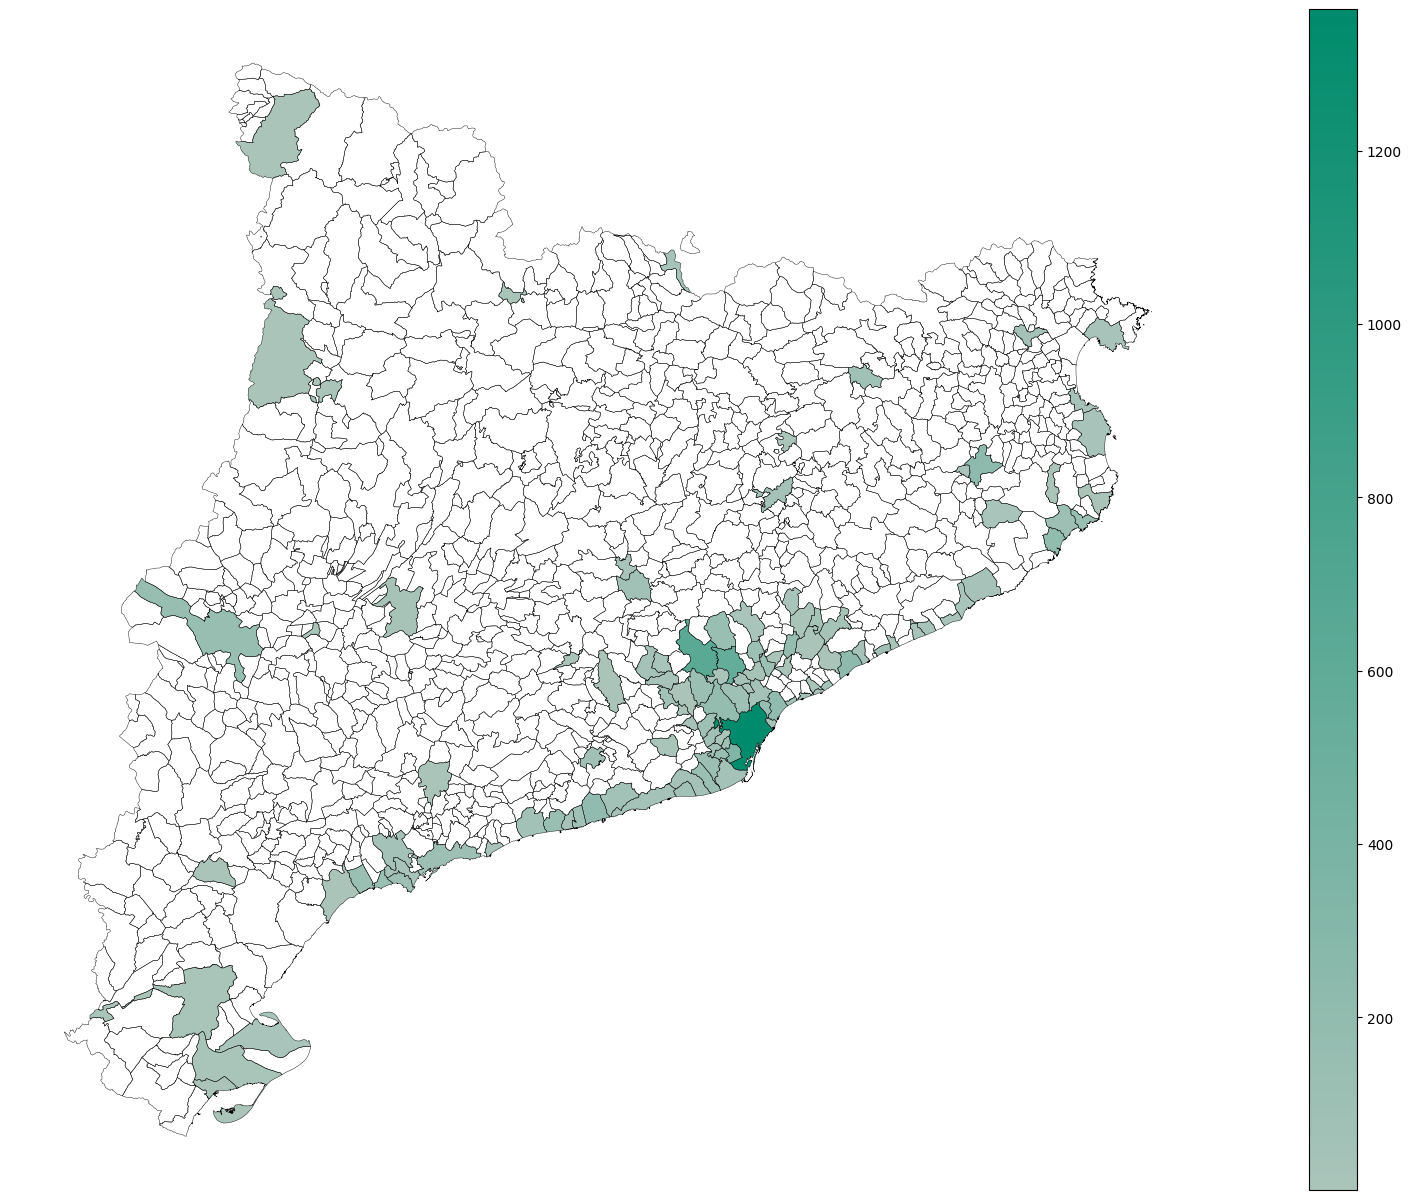

In [7]:

prommun_map = bbdd_estudi_prom_2023[["CODIMUN", "Municipi","HABIP"]].groupby(["CODIMUN", "Municipi"]).sum().reset_index()
prommun_map.columns = ["municipi", "Municipi_n", "Habitatges en oferta"]
prommun_map["municipi"] = prommun_map["municipi"].astype(int)

prommun_map

shapefile_mun = gpd.read_file(path + "shapefile_mun.geojson")
shapefile_mun["municipi"] = shapefile_mun["codiine"].astype(int)
tmp = pd.merge(shapefile_mun, prommun_map, how="left", on="municipi")

tmp

fig, ax = plt.subplots(1,1, figsize=(20,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=-1) #resize the colorbar
cmap = colors.LinearSegmentedColormap.from_list("mi_paleta", ["#AAC4BA","#008B6C"]) 

tmp.plot(column='Habitatges en oferta', ax=ax,cax=cax, cmap=cmap, legend=True)
tmp.geometry.boundary.plot(color='black', ax=ax, linewidth=0.3) #Add some borders to the geometries
ax.axis('off')
fig.patch.set_alpha(0)



In [8]:

def weighted_mean(data):
    weighted_sum = (data['Valor'] * data['Unitats']).sum()
    sum_peso = data['Unitats'].sum()
    # data["Valor"] = weighted_sum / sum_peso
    return weighted_sum / sum_peso


df_final[(df_final["Any"]==2023) & (df_final["Àmbits territorials"]=="Comarques Gironines") & (df_final["Tipologia"]=="TOTAL HABITATGES") & (df_final["Variable"]=="Preu de venda per m² útil (€)")]




,Any,Tipologia,Variable,GEO,Valor,Àmbits territorials,Comarques,Corones,Província,codiine,Unitats
5492,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),Banyoles,NaN,Comarques Gironines,Pla de l'Estany,NaN,Girona,17015.0,NaN
5501,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),"Bisbal d'Empordà, la",1541.973651,Comarques Gironines,Baix Empordà,06 Municipis turístics Mar Centre. Girona,Girona,17022.0,5.0
5510,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),Blanes,3015.761012,Comarques Gironines,Selva,05 Municipis turístics Mar Sud. Girona,Girona,17023.0,11.0
5519,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),Calonge i Sant Antoni,4771.597814,Comarques Gironines,Baix Empordà,07 Municipis turístics Mar Nord. Girona,Girona,17034.0,100.0
5528,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),Cassà de la Selva,2104.813788,Comarques Gironines,Gironès,07 Municipis turístics Mar Nord. Girona,Girona,17044.0,9.0
5537,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),Castell-Platja d'Aro,5911.374958,Comarques Gironines,Baix Empordà,07 Municipis turístics Mar Nord. Girona,Girona,17048.0,205.0
5546,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),"Escala, l'",4131.136977,Comarques Gironines,Alt Empordà,07 Municipis turístics Mar Nord. Girona,Girona,17062.0,27.0
5555,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),Figueres,1571.614929,Comarques Gironines,Alt Empordà,07 Municipis turístics Mar Nord. Girona,Girona,17066.0,39.0
5564,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),Girona,3984.043554,Comarques Gironines,Gironès,09 Municipis de l'Àmbit territorial Comarques ...,Girona,17079.0,236.0
5573,2023,TOTAL HABITATGES,Preu de venda per m² útil (€),Lloret de Mar,5411.774862,Comarques Gironines,Selva,05 Municipis turístics Mar Sud. Girona,Girona,17095.0,23.0


In [9]:
ambits_df

,Any,Tipologia,Variable,GEO,Valor
0,2018,HABITATGES PLURIFAMILIARS,Preu de venda per m² útil (€),Alt Pirineu i Aran,1734.447144
1,2018,HABITATGES PLURIFAMILIARS,Preu de venda per m² útil (€),Camp de Tarragona,2331.348155
2,2018,HABITATGES PLURIFAMILIARS,Preu de venda per m² útil (€),Comarques Centrals,2001.290788
3,2018,HABITATGES PLURIFAMILIARS,Preu de venda per m² útil (€),Comarques Gironines,2991.712331
4,2018,HABITATGES PLURIFAMILIARS,Preu de venda per m² útil (€),Metropolità,4784.599846
...,...,...,...,...,...
139,2023,HABITATGES UNIFAMILIARS,Unitats,Ponent,42.000000
140,2023,TOTAL HABITATGES,Unitats,Ponent,582.000000
141,2023,HABITATGES PLURIFAMILIARS,Unitats,Terres de l'Ebre,87.000000
142,2023,HABITATGES UNIFAMILIARS,Unitats,Terres de l'Ebre,48.000000


In [10]:
def table_geo(geo, any_ini, any_fin, selected):
    if selected=="Àmbits territorials":
        df_prov_filtered = ambits_df[(ambits_df["GEO"]==geo) & (ambits_df["Any"]>=any_ini) & (ambits_df["Any"]<=any_fin)].pivot(index=["Any"], columns=["Tipologia", "Variable"], values="Valor")
        df_prov_n = df_prov_filtered.sort_index(axis=1, level=[0,1])
        num_cols = df_prov_n.select_dtypes(include=['float64', 'int64']).columns
        df_prov_n[num_cols] = df_prov_n[num_cols].round(0)
        df_prov_n[num_cols] = df_prov_n[num_cols].astype("float64")
        num_cols = df_prov_n.select_dtypes(include=['float64', 'int']).columns
        df_prov_n[num_cols] = df_prov_n[num_cols].applymap(lambda x: '{:,.0f}'.format(x).replace(',', '#').replace('.', ',').replace('#', '.'))
        return(df_prov_n)
    if selected=="Províncies" or selected=="Catalunya":
        df_prov_filtered = provincia_df[(provincia_df["GEO"]==geo) & (provincia_df["Any"]>=any_ini) & (provincia_df["Any"]<=any_fin)].pivot(index=["Any"], columns=["Tipologia", "Variable"], values="Valor")
        df_prov_n = df_prov_filtered.sort_index(axis=1, level=[0,1])
        num_cols = df_prov_n.select_dtypes(include=['float64', 'int64']).columns
        df_prov_n[num_cols] = df_prov_n[num_cols].round(0)
        df_prov_n[num_cols] = df_prov_n[num_cols].astype(int)
        num_cols = df_prov_n.select_dtypes(include=['float64', 'int']).columns
        df_prov_n[num_cols] = df_prov_n[num_cols].applymap(lambda x: '{:,.0f}'.format(x).replace(',', '#').replace('.', ',').replace('#', '.'))
        return(df_prov_n)
        
table_geo("Metropolità", 2018, 2022, "Àmbits territorials")
    

Tipologia     HABITATGES PLURIFAMILIARS  \
Variable  Preu de venda per m² útil (€)   
Any                                       
2018                              4.785   
2019                              4.215   
2020                              4.390   
2021                              5.056   
2022                              4.944   

Tipologia                                         \
Variable  Preu mitjà de venda de l'habitatge (€)   
Any                                                
2018                                     445.522   
2019                                     377.376   
2020                                     363.019   
2021                                     414.597   
2022                                     392.220   

Tipologia                                             HABITATGES UNIFAMILIARS  \
Variable  Superfície mitjana (m² útils) Unitats Preu de venda per m² útil (€)   
Any                                                                             
2018                                 91   5.394                         3.090   
2019                                 91  15.804                         3.750   
2020                                 82  12.195                         3.038   
2021                                 80  12.726                         3.346   
2022                                 77  16.395                         3.817   

Tipologia                                         \
Variable  Preu mitjà de venda de l'habitatge (€)   
Any                                                
2018                                     851.034   
2019                                     892.810   
2020                                     641.088   
2021                                     625.729   
2022                                     580.962   

Tipologia                                                    TOTAL HABITATGES  \
Variable  Superfície mitjana (m² útils) Unitats Preu de venda per m² útil (€)   
Any                                                                             
2018                                255     351                         4.701   
2019                                218     369                         4.204   
2020                                201     399                         4.347   
2021                                189     435                         4.999   
2022                                156     315                         4.923   

Tipologia                                         \
Variable  Preu mitjà de venda de l'habitatge (€)   
Any                                                
2018                                     476.615   
2019                                     389.183   
2020                                     371.829   
2021                                     421.575   
2022                                     395.778   

Tipologia                                        
Variable  Superfície mitjana (m² útils) Unitats  
Any                                              
2018                                102   5.745  
2019                                 94  16.173  
2020                                 86  12.594  
2021                                 84  13.161  
2022                                 79  16.710